## Revisando as possiveis Tabelas

In [1]:
# abrir bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline

## Base Final

In [2]:
final = pd.read_csv('C:/Users/afilg/OneDrive/DATA SCIENCE/Aulas - Originais/Projeto_Integrador/final.csv')

In [3]:
final = final.drop(['Unnamed: 0'], axis = 1)

In [4]:
final.head(2).T

,0,1
tconst,tt0118589,tt0120681
primaryTitle,Glitter,From Hell
startYear,2001,2001
runtimeMinutes,104,122
genre_1,Drama,Horror
...,...,...
writer_1_ratingAverage,NaN,NaN
writer_2_ratingAverage,6.9,NaN
AvgRating,5.8,6.25821
numFilmes,0.25,1


In [5]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tconst                                1490 non-null   object 
 1   primaryTitle                          1490 non-null   object 
 2   startYear                             1490 non-null   int64  
 3   runtimeMinutes                        1490 non-null   int64  
 4   genre_1                               1490 non-null   object 
 5   genre_2                               1373 non-null   object 
 6   genre_3                               997 non-null    object 
 7   Item                                  1490 non-null   int64  
 8   Mês                                   1490 non-null   object 
 9   month                                 1490 non-null   float64
 10  day                                   1490 non-null   float64
 11  year             

In [6]:
final = final.drop(['rating','primaryTitle','Mês','Item','Data Portugues','on_streaming_date','Negative','Positive','All','movieyear','directors_1','directors_2','writers_1','writers_2','rating_num','tomatometer_rating','tomatometer_count','audience_want_to_see_count','audience_rating','audience_count','audience_top_critics_count','audience_fresh_critics_count','audience_rotten_critics_count','audience_fresh_top_critics_count','audience_rotten_rotten_critics_count','tomatometer_avg_rating','audience_top_critics_avg_rating','score_sentiment','startYear'], axis = 1)                           

In [7]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tconst                     1490 non-null   object 
 1   runtimeMinutes             1490 non-null   int64  
 2   genre_1                    1490 non-null   object 
 3   genre_2                    1373 non-null   object 
 4   genre_3                    997 non-null    object 
 5   month                      1490 non-null   float64
 6   day                        1490 non-null   float64
 7   year                       1490 non-null   int64  
 8   FW                         1490 non-null   int64  
 9   Worldwide_Gross            1490 non-null   float64
 10  Production_Budget          1490 non-null   float64
 11  rentability                1490 non-null   float64
 12  log_rentability            1490 non-null   float64
 13  movie_info                 1490 non-null   objec

## Analise da Target

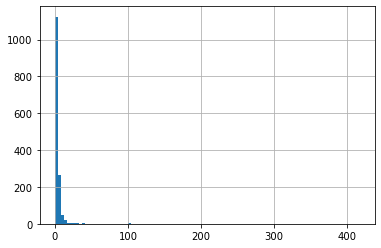

In [8]:
final['rentability'].hist(bins = 100)

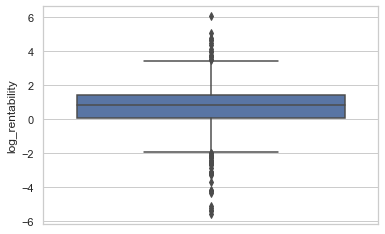

In [9]:
sns.set(style="whitegrid")
tips = final
ax = sns.boxplot(y='log_rentability',data = tips)

In [10]:
final = final[(final.log_rentability > -4)&(final.log_rentability < 4)]

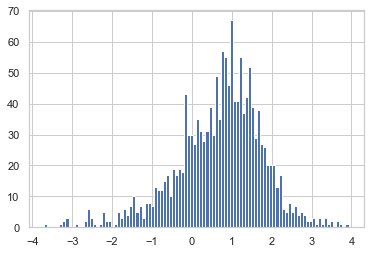

In [11]:
final['log_rentability'].hist(bins = 100)

## Dummização

### Geneross

In [12]:
Genero1 = pd.get_dummies(final['genre_1'])

In [13]:
Genero1.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Sci-Fi,Thriller
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [14]:
Genero2 = pd.get_dummies(final['genre_2'])

In [15]:
Genero2.head()

,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
Genero3 = pd.get_dummies(final['genre_3'])

In [17]:
Genero3.head()

,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
Generos = Genero1.join(Genero2, rsuffix = "_2")
Generos = Generos.join(Genero3, rsuffix = "_3")

In [19]:
Generos['Adventure_Geral']=Generos['Adventure']+Generos['Adventure_2']
Generos['Animation_Geral']=Generos['Animation']+Generos['Animation_2']+Generos['Animation_3']
Generos['Biography_Geral']=Generos['Biography']+Generos['Biography_2']+Generos['Biography_3']
Generos['Comedy_Geral']=Generos['Comedy']+Generos['Comedy_2']+Generos['Comedy_3']
Generos['Crime_Geral']=Generos['Crime']+Generos['Crime_2']+Generos['Crime_3']
Generos['Documentary_Geral']=Generos['Documentary']+Generos['Documentary_2']
Generos['Drama_Geral']=Generos['Drama']+Generos['Drama_2']+Generos['Drama_3']
Generos['Family_Geral']=Generos['Family']+Generos['Family_3']
Generos['Fantasy_Geral']=Generos['Fantasy']+Generos['Fantasy_2']+Generos['Fantasy_3']
Generos['History_Geral']=Generos['History']+Generos['History_3']
Generos['Horror_Geral']=Generos['Horror']+Generos['Horror_2']+Generos['Horror_3']
Generos['Music_Geral']=Generos['Music']+Generos['Music_3']
Generos['Musical_Geral']=Generos['Musical']+Generos['Musical_2']+Generos['Musical_3']
Generos['Mystery_Geral']=Generos['Mystery']+Generos['Mystery_2']+Generos['Mystery_3']
Generos['Romance_Geral']=Generos['Romance']+Generos['Romance_3']
Generos['Sci-Fi_Geral']=Generos['Sci-Fi']+Generos['Sci-Fi_2']+Generos['Sci-Fi_3']
Generos['Sport_Geral']=Generos['Sport']+Generos['Sport_3']
Generos['Thriller_Geral']=Generos['Thriller']+Generos['Thriller_2']+Generos['Thriller_3']
Generos['War_Geral']=Generos['War']+Generos['War_3']
Generos['Western_Geral']=Generos['Western']+Generos['Western_3']

In [20]:
Generos = Generos.drop(['Action','Adventure','Adventure_2','Animation','Animation_2','Animation_3','Biography','Biography_2','Biography_3','Comedy','Comedy_2','Comedy_3','Crime','Crime_2','Crime_3','Documentary','Documentary_2','Drama','Drama_2','Drama_3','Family','Family_3','Fantasy','Fantasy_2','Fantasy_3','History','History_3','Horror','Horror_2','Horror_3','Music','Music_3','Musical','Musical_2','Musical_3','Mystery','Mystery_2','Mystery_3','Romance','Romance_3','Sci-Fi','Sci-Fi_2','Sci-Fi_3','Sport','Sport_3','Thriller','Thriller_2','Thriller_3','War','War_3','Western','Western_3'],axis = 1)

In [21]:
Generos

,Adventure_Geral,Animation_Geral,Biography_Geral,Comedy_Geral,Crime_Geral,Documentary_Geral,Drama_Geral,Family_Geral,Fantasy_Geral,History_Geral,Horror_Geral,Music_Geral,Musical_Geral,Mystery_Geral,Romance_Geral,Sci-Fi_Geral,Sport_Geral,Thriller_Geral,War_Geral,Western_Geral
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1486,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1487,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1488,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [22]:
final_generos = final.join(Generos)

In [23]:
final_generos = final_generos.drop(['genre_1','genre_2','genre_3'], axis = 1)

### Estudios

In [24]:
temp = pd.pivot_table(final_generos, values='tconst', index='studio_name', aggfunc='count')
temp

,tconst
studio_name,
20th Century Fox,122
20th Century Fox Distribution,1
20th Century Fox/Regency Films,1
A24,5
A24 Films,2
...,...
Working Title Films,1
Yari Film Group,1
Yari Film Group Releasing,1


In [25]:
studios = pd.read_csv('C:/Users/afilg/OneDrive/DATA SCIENCE/Aulas - Originais/Projeto_Integrador/test_2.csv')

In [26]:
studios.head()

,studio_name,new_studio
0,20th Century Fox,Big_Studio
1,20th Century Fox Distribution,Big_Studio
2,20th Century Fox/Regency Films,Big_Studio
3,Blue Sky Studio/20th Century Fox,Big_Studio
4,Fox Atomic,Big_Studio


In [27]:
final_generos = final_generos.join(studios.set_index('studio_name'), on = 'studio_name')

In [28]:
final_generos = final_generos.drop(['studio_name'], axis = 1)

In [29]:
studios = pd.get_dummies(final_generos['new_studio'])

In [30]:
final_generos_studios = final_generos.join(studios)

In [31]:
final_generos_studios = final_generos_studios.drop(['new_studio'], axis = 1)

In [32]:
final_generos_studios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1489
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tconst                     1472 non-null   object 
 1   runtimeMinutes             1472 non-null   int64  
 2   month                      1472 non-null   float64
 3   day                        1472 non-null   float64
 4   year                       1472 non-null   int64  
 5   FW                         1472 non-null   int64  
 6   Worldwide_Gross            1472 non-null   float64
 7   Production_Budget          1472 non-null   float64
 8   rentability                1472 non-null   float64
 9   log_rentability            1472 non-null   float64
 10  movie_info                 1472 non-null   object 
 11  tomatometer_status         1472 non-null   object 
 12  audience_status            1472 non-null   object 
 13  audience_avg_rating        1472 non-null   float

### Tomatometros

In [33]:
tomatometro = pd.get_dummies(final_generos_studios['tomatometer_status'])

In [34]:
audiencia_rt = pd.get_dummies(final_generos_studios['audience_status'])

In [35]:
rt_dummies = tomatometro.join(audiencia_rt)

In [36]:
rt_dummies.head()

,certified_fresh,fresh,rotten,spilled,upright
0,0,0,1,1,0
1,0,0,1,0,1
2,1,0,0,0,1
3,0,0,1,1,0
4,0,1,0,0,1


In [37]:
final_generos_studios_rt = final_generos_studios.join(rt_dummies)

In [38]:
#final_generos_studios_rt = final_generos_studios

In [39]:
final_generos_studios_rt = final_generos_studios_rt.drop(['tomatometer_status','audience_status'], axis = 1)

### Visualização Final

In [40]:
final_generos_studios_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1489
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tconst                     1472 non-null   object 
 1   runtimeMinutes             1472 non-null   int64  
 2   month                      1472 non-null   float64
 3   day                        1472 non-null   float64
 4   year                       1472 non-null   int64  
 5   FW                         1472 non-null   int64  
 6   Worldwide_Gross            1472 non-null   float64
 7   Production_Budget          1472 non-null   float64
 8   rentability                1472 non-null   float64
 9   log_rentability            1472 non-null   float64
 10  movie_info                 1472 non-null   object 
 11  audience_avg_rating        1472 non-null   float64
 12  negative_perc              1472 non-null   float64
 13  positive_perc              1472 non-null   float

In [41]:
final_generos_studios_rt.head().T

,0,1,2,3,4
tconst,tt0118589,tt0120681,tt0120737,tt0120755,tt0122459
runtimeMinutes,104,122,178,123,115
month,9,10,12,5,4
day,21,19,19,24,7
year,2001,2001,2001,2000,2000
FW,38,42,51,21,14
Worldwide_Gross,4.27337e+06,6.87124e+07,8.87211e+08,5.49589e+08,3.26623e+07
Production_Budget,8.5e+06,3.5e+07,1.09e+08,1.2e+08,2.4e+07
rentability,0.50275,1.96321,8.13955,4.5799,1.36093
log_rentability,-0.687663,0.674581,2.09673,1.52168,0.308168


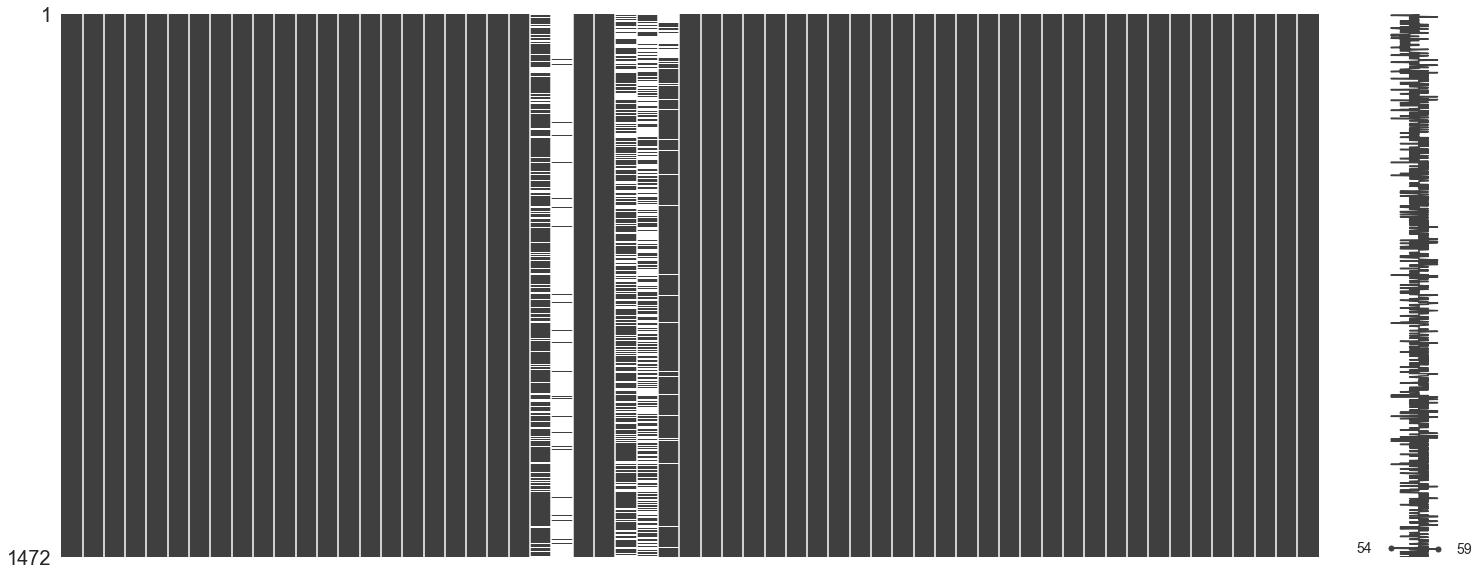

In [42]:
import missingno as msno
msno.matrix(final_generos_studios_rt)

In [43]:
final_generos_studios_rt = final_generos_studios_rt.fillna(0)

In [44]:
final_generos_studios_rt = final_generos_studios_rt.drop(['directors_2_films','directors_2_ratingAverage','writer_2_films','writer_2_ratingAverage','audience_avg_rating'], axis = 1)

## Correlação

In [45]:
abs(final_generos_studios_rt.corr()['log_rentability']).sort_values(ascending = False).head(10)

log_rentability     1.000000
rentability         0.726308
Worldwide_Gross     0.401620
numVotes            0.359109
averageRating       0.246775
certified_fresh     0.235275
rotten              0.219817
upright             0.209606
spilled             0.209606
Premium_Indicado    0.201630
Name: log_rentability, dtype: float64

## Regressoes Model

In [46]:
def regressoes(nome_model,X,y):
    #ignorando os warnings
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # importnado as bibliotecas com os modelos classificadores
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression
    
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # definindo uma lista com todos os classificadores
    regressors = [
        LinearRegression(),
        RandomForestRegressor(),
        GradientBoostingRegressor()]

    # definindo o tamanho da figura para o gráfico
    plt.figure(figsize=(12,8))

    # rotina para instanciar, predizer e medir os rasultados de todos os modelos
    dfs = []

    for regr in regressors:
        # instanciando o modelo
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        # armazenando o nome do modelo na variável name
        name = regr.__class__.__name__
        #Metricas
        from sklearn.metrics import mean_squared_error
        from sklearn.metrics import r2_score

        R2_train = regr.score(X_train, y_train)
        MSE = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = (np.sum(np.abs((y_test - y_pred)/y_test)*100))/len(y_test)
        R2_test = r2_score(y_test, y_pred)

        d = {'Processo': [nome_model], 'Modelo': [name],'MSE': [MSE], 'RMSE': [rmse], 'MAPE': [mape], 'R2_train': [R2_train], 'R2_test': [R2_test]}
        modelos = pd.DataFrame(data = d)

        dfs.append(modelos)

    Tabela = pd.concat(dfs)

    return Tabela    

## 1a Regressao

In [47]:
columns = final_generos_studios_rt.drop(['tconst', 'month','Worldwide_Gross','Production_Budget', 'day', 'year', 'log_rentability','rentability','movie_info','numVotes'], axis=1)

X= columns.values
y = final_generos_studios_rt['log_rentability']

In [48]:
Tabela = regressoes('inicial',X,y)

<Figure size 864x576 with 0 Axes>

## Com Min Max Scaler

In [49]:
columns = final_generos_studios_rt.drop(['tconst', 'month','Worldwide_Gross','Production_Budget', 'day', 'year', 'log_rentability','rentability','movie_info','numVotes'], axis=1)

X= columns.values
# variável target
y = final_generos_studios_rt['log_rentability']
# dividindo oa dados em treino e teste

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.31952663, 0.71153846, 0.62731334, ..., 1.        , 1.        ,
        0.        ],
       [0.4260355 , 0.78846154, 0.36332695, ..., 1.        , 0.        ,
        1.        ],
       [0.75739645, 0.96153846, 0.16776139, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.31360947, 0.92307692, 0.10244629, ..., 0.        , 0.        ,
        1.        ],
       [0.4556213 , 0.40384615, 0.14289854, ..., 0.        , 0.        ,
        1.        ],
       [0.43195266, 0.92307692, 0.34279986, ..., 0.        , 0.        ,
        1.        ]])

In [51]:
minmax = regressoes('MinMax',X,y)

<Figure size 864x576 with 0 Axes>

In [52]:
Tabela = pd.concat([Tabela,minmax])
Tabela

,Processo,Modelo,MSE,RMSE,MAPE,R2_train,R2_test
0,inicial,LinearRegression,1.091373,1.044688,205.636216,0.252806,0.173733
0,inicial,RandomForestRegressor,1.030251,1.015013,167.783824,0.887844,0.220008
0,inicial,GradientBoostingRegressor,1.101818,1.049675,190.031693,0.526310,0.165825
0,MinMax,LinearRegression,1.091373,1.044688,205.636216,0.252806,0.173733
0,MinMax,RandomForestRegressor,1.036590,1.018131,165.294940,0.885898,0.215209
0,MinMax,GradientBoostingRegressor,1.100234,1.048920,189.504846,0.526310,0.167025


## Clustering

In [53]:
columns = final_generos_studios_rt.drop(['tconst','month','day','year','Worldwide_Gross','rentability','log_rentability','movie_info'], axis = 1)

In [54]:
X_sample = columns.values 
y_sample = final.loc[:,'log_rentability'].values 

In [55]:
# plotando o silhouette score
# variância ideal é aquela mais perto de 1, por isso queremos o maior silhouette score

from sklearn.metrics import silhouette_score   
from sklearn.cluster import KMeans

sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X_sample)
    sillhoute_scores.append(silhouette_score(X_sample, kmeans.labels_))

([<matplotlib.axis.XTick at 0x246315afa08>,
 <a list of 31 Text major ticklabel objects>)

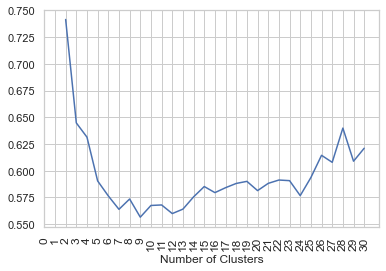

In [56]:
plt.plot(n_cluster_list,sillhoute_scores)
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 31), fontsize=12, rotation=90)

In [57]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

KMeans()

In [58]:
final_generos_studios_rt['cluster'] = kmeans.labels_

In [59]:
def plotcolum(a,b):
    plt.figure(figsize=(10,5))
    sns.countplot(y = a, data = b, order = a.value_counts().index)
    plt.show()

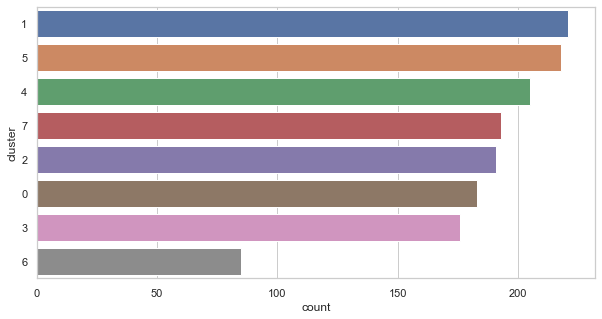

In [60]:
plotcolum(final_generos_studios_rt['cluster'],final_generos_studios_rt)

In [61]:
final_generos_studios_rt.cluster.value_counts()

1    221
5    218
4    205
7    193
2    191
0    183
3    176
6     85
Name: cluster, dtype: int64

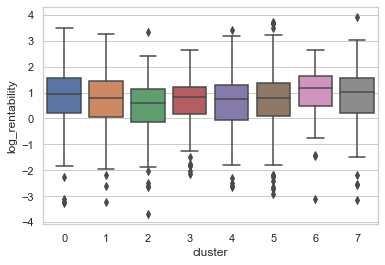

In [62]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='log_rentability',data = tips)

In [63]:
Values = ['Adventure_Geral','Animation_Geral','Biography_Geral','Comedy_Geral','Crime_Geral','Documentary_Geral','Drama_Geral','Family_Geral','Fantasy_Geral','History_Geral','Horror_Geral','Music_Geral','Musical_Geral','Mystery_Geral','Romance_Geral','Sci-Fi_Geral','Sport_Geral','Thriller_Geral','War_Geral','Western_Geral']

In [64]:
Generos = pd.DataFrame(pd.pivot_table(final_generos_studios_rt, values=Values, index=['cluster'], aggfunc=np.sum).T)

In [65]:
Generos

cluster,0,1,2,3,4,5,6,7
Adventure_Geral,26,38,35,52,33,53,35,48
Animation_Geral,25,3,8,0,8,34,0,31
Biography_Geral,24,48,1,12,4,5,14,16
Comedy_Geral,87,57,100,49,121,130,4,92
Crime_Geral,23,42,39,44,40,34,14,31
Documentary_Geral,2,0,1,0,0,2,0,1
Drama_Geral,139,179,32,82,46,73,60,107
Family_Geral,15,14,11,2,13,30,2,23
Fantasy_Geral,9,19,20,13,24,21,11,12
History_Geral,5,10,1,4,0,2,11,7


In [66]:
Values = ['Big_Studio','Known_Studio','independent']

In [67]:
Studios = pd.DataFrame(pd.pivot_table(final_generos_studios_rt, values=Values, index=['cluster'], aggfunc=np.sum).T)

In [68]:
Studios

cluster,0,1,2,3,4,5,6,7
Big_Studio,95,145,127,121,134,138,61,126
Known_Studio,47,40,35,30,45,42,18,38
independent,41,36,29,25,23,37,6,28


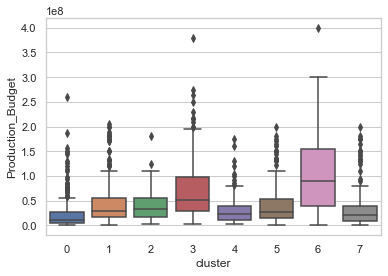

In [69]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='Production_Budget',data = tips)

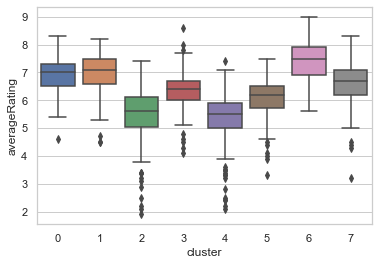

In [70]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='averageRating',data = tips)

## Com Cluster

In [71]:
columns = final_generos_studios_rt.drop(['tconst', 'month','Worldwide_Gross','Production_Budget', 'day', 'year', 'log_rentability','rentability','movie_info','numVotes'], axis=1)

X= columns.values
# variável target
y = final_generos_studios_rt['log_rentability']
# dividindo oa dados em treino e teste

In [72]:
cluster_basic = regressoes('cluster_basic',X,y)

<Figure size 864x576 with 0 Axes>

In [73]:
Tabela = pd.concat([Tabela,cluster_basic])
Tabela

,Processo,Modelo,MSE,RMSE,MAPE,R2_train,R2_test
0,inicial,LinearRegression,1.091373,1.044688,205.636216,0.252806,0.173733
0,inicial,RandomForestRegressor,1.030251,1.015013,167.783824,0.887844,0.220008
0,inicial,GradientBoostingRegressor,1.101818,1.049675,190.031693,0.526310,0.165825
0,MinMax,LinearRegression,1.091373,1.044688,205.636216,0.252806,0.173733
0,MinMax,RandomForestRegressor,1.036590,1.018131,165.294940,0.885898,0.215209
0,MinMax,GradientBoostingRegressor,1.100234,1.048920,189.504846,0.526310,0.167025
0,cluster_basic,LinearRegression,1.091153,1.044583,205.060532,0.252865,0.173899
0,cluster_basic,RandomForestRegressor,1.064357,1.031677,177.360543,0.888726,0.194186
0,cluster_basic,GradientBoostingRegressor,1.095299,1.046565,185.339790,0.522724,0.170761


In [74]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.31952663, 0.71153846, 0.62731334, ..., 1.        , 0.        ,
        0.28571429],
       [0.4260355 , 0.78846154, 0.36332695, ..., 0.        , 1.        ,
        0.14285714],
       [0.75739645, 0.96153846, 0.16776139, ..., 0.        , 1.        ,
        0.85714286],
       ...,
       [0.31360947, 0.92307692, 0.10244629, ..., 0.        , 1.        ,
        0.        ],
       [0.4556213 , 0.40384615, 0.14289854, ..., 0.        , 1.        ,
        0.14285714],
       [0.43195266, 0.92307692, 0.34279986, ..., 0.        , 1.        ,
        0.14285714]])

In [75]:
cluster_MinMax = regressoes('cluster_MinMax',X,y)

<Figure size 864x576 with 0 Axes>

In [76]:
Tabela = pd.concat([Tabela,cluster_MinMax])
Tabela

,Processo,Modelo,MSE,RMSE,MAPE,R2_train,R2_test
0,inicial,LinearRegression,1.091373,1.044688,205.636216,0.252806,0.173733
0,inicial,RandomForestRegressor,1.030251,1.015013,167.783824,0.887844,0.220008
0,inicial,GradientBoostingRegressor,1.101818,1.049675,190.031693,0.526310,0.165825
0,MinMax,LinearRegression,1.091373,1.044688,205.636216,0.252806,0.173733
0,MinMax,RandomForestRegressor,1.036590,1.018131,165.294940,0.885898,0.215209
0,MinMax,GradientBoostingRegressor,1.100234,1.048920,189.504846,0.526310,0.167025
0,cluster_basic,LinearRegression,1.091153,1.044583,205.060532,0.252865,0.173899
0,cluster_basic,RandomForestRegressor,1.064357,1.031677,177.360543,0.888726,0.194186
0,cluster_basic,GradientBoostingRegressor,1.095299,1.046565,185.339790,0.522724,0.170761
0,cluster_MinMax,LinearRegression,1.091153,1.044583,205.060532,0.252865,0.173899


In [77]:
Tabela.sort_values(by = 'R2_test', ascending = False)

,Processo,Modelo,MSE,RMSE,MAPE,R2_train,R2_test
0,inicial,RandomForestRegressor,1.030251,1.015013,167.783824,0.887844,0.220008
0,MinMax,RandomForestRegressor,1.036590,1.018131,165.294940,0.885898,0.215209
0,cluster_MinMax,RandomForestRegressor,1.054722,1.026997,178.594699,0.889353,0.201481
0,cluster_basic,RandomForestRegressor,1.064357,1.031677,177.360543,0.888726,0.194186
0,cluster_basic,LinearRegression,1.091153,1.044583,205.060532,0.252865,0.173899
0,cluster_MinMax,LinearRegression,1.091153,1.044583,205.060532,0.252865,0.173899
0,inicial,LinearRegression,1.091373,1.044688,205.636216,0.252806,0.173733
0,MinMax,LinearRegression,1.091373,1.044688,205.636216,0.252806,0.173733
0,cluster_MinMax,GradientBoostingRegressor,1.094186,1.046034,185.065894,0.522724,0.171603
0,cluster_basic,GradientBoostingRegressor,1.095299,1.046565,185.339790,0.522724,0.170761


## Hyperparameter Tunning

## Validacao

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
columns = final_generos_studios_rt.drop(['tconst', 'month','Worldwide_Gross','Production_Budget', 'day', 'year', 'log_rentability','rentability','movie_info','numVotes'], axis=1)

X= columns.values
# variável target
y = final_generos_studios_rt['log_rentability']

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def run_cv(X_train, y_train, k):
    model = RandomForestRegressor()
    
    score = cross_val_score(estimator=model,\
                            X=X_train,\
                            y=y_train,\
                            scoring='neg_mean_squared_error',\
                            cv=k)
    return score*-1

In [ ]:
score20 = run_cv(X_train, y_train, 20)
print('mean', score20.mean())
print('std', score20.std())

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.bar(range(len(score20)), score20)
plt.grid()
plt.xlabel('Número do fold')
plt.ylabel('MAE');

## Regressoes por Cluster

In [ ]:
clusters = [0,1,2,3,4,5,6,7]
dfs = []
for i in clusters:
    project = final_generos_studios_rt[final_generos_studios_rt.cluster == i ]
    columns = project.drop(['tconst', 'month','Worldwide_Gross','Production_Budget', 'day', 'year', 'log_rentability','rentability','movie_info','numVotes'], axis=1)
    
    X= columns.values
    y = project['log_rentability']

    # definindo uma lista com todos os classificadores
    regressors = [
        LinearRegression(),
        RandomForestRegressor(),
        GradientBoostingRegressor()]

    # definindo o tamanho da figura para o gráfico
    plt.figure(figsize=(12,8))

    for regr in regressors:
        # instanciando o modelo
        regr.fit(X, y)
        y_pred = regr.predict(X)
        # armazenando o nome do modelo na variável name
        name = regr.__class__.__name__
        #Metricas
        from sklearn.metrics import mean_squared_error
        from sklearn.metrics import r2_score

        MSE = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        mape = (np.sum(np.abs((y - y_pred)/y)*100))/len(y)
        R2 = r2_score(y, y_pred)

        d = {'Cluster': [i],'Modelo': [name],'MSE': [MSE], 'RMSE': [rmse], 'MAPE': [mape], 'R2': [R2]}
        modelos = pd.DataFrame(data = d)

        dfs.append(modelos)

Tabela = pd.concat(dfs) 

In [ ]:
Tabela.sort_values(by = ['Cluster','R2'], ascending = False)

## ANN

In [ ]:
import itertools
from keras.optimizers import RMSprop, Adadelta, Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
%matplotlib inline

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50)